In [1]:
import numpy as np
from scipy.stats import norm, chisquare
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../python/")
sys.path.insert(0, "../")
import vsim.load as load
import vsim.analyze as analyze
import h5py
import matplotlib.mlab as mlab
global kb, me
kb = 1.38064852e-23; # J/K
me  = 9.10938356e-31; # kg
% matplotlib notebook

In [2]:
simPath = "/home/keenan/Desktop/VSim_Test/Ionize_v02/";
specFile = "laserIonize_ionizedElectrons_11.h5";
fileName = simPath + specFile;

In [3]:
data = load.get_species_data(fileName, 'ionizedElectrons')

In [4]:
ux = analyze.get_ux(data)
uy = analyze.get_uy(data)
weights = analyze.get_weights(data)
gammas = analyze.get_ptc_gamma(data)
u = np.sqrt(ux**2 + uy**2)
v = u/gammas;
print(v.shape, weights.shape)

(28567,) (28567,)


<IPython.core.display.Javascript object>


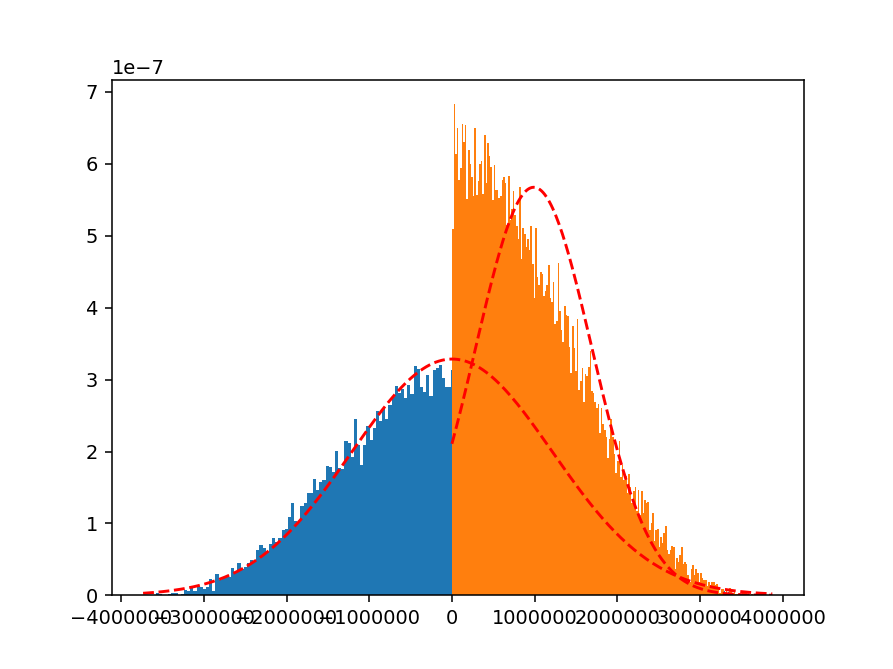

8.384710725063151

In [5]:
(mu, sigma) = norm.fit(uy/gammas)
n, bins, patches = plt.hist(uy/gammas , 200, weights = weights, normed = True)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y , '--r')
plt.show()
(me * sigma**2 / kb)/11600

<IPython.core.display.Javascript object>


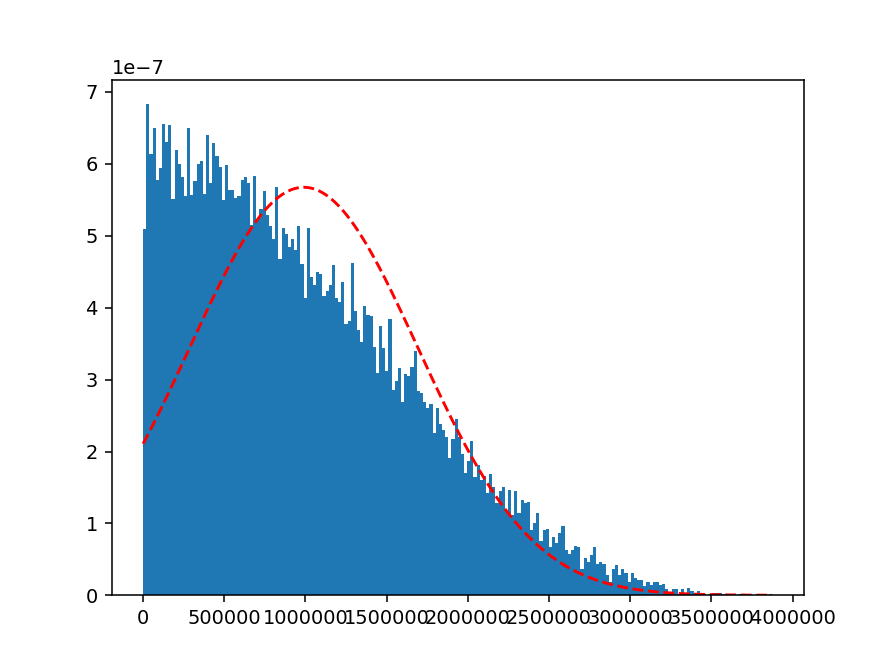

703029.764741 2.81122297146


In [7]:
(mu, sigma) = norm.fit(v)
n, bins, patches = plt.hist(v, 200, weights = weights, normed = True)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, '--r')
plt.show()
Tfit = (me * sigma**2 / kb)/11600
print(sigma, Tfit)

In [8]:
amax = np.argmax(y)
sigP = bins[amax] + sigma
sigM = bins[amax] -  sigma

<IPython.core.display.Javascript object>


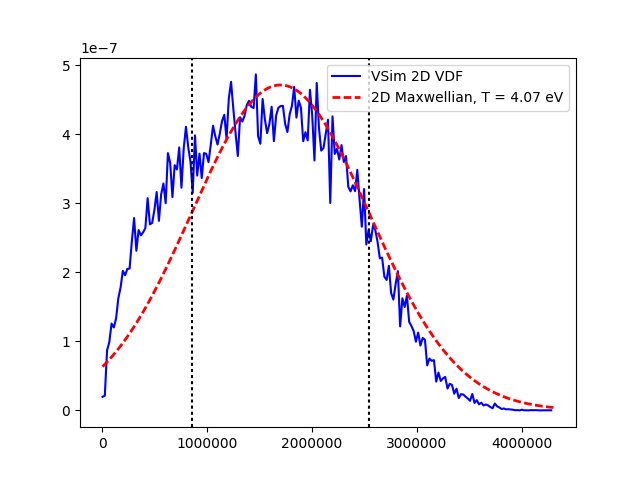

In [10]:
plt.plot(bins[0:-1], n, '-b', linewidth = 1.5, label = 'VSim 2D VDF')
fitLabel = ("2D Maxwellian, T = %.2f eV") % Tfit
plt.plot(bins, y, '--r', linewidth = 2, label = fitLabel)
plt.axvline(x = sigP, color = 'k', linestyle = ':', linewidth = 1.5)
plt.axvline(x = sigM, color = 'k', linestyle = ':', linewidth = 1.5)
plt.legend()
plt.show()

In [11]:
mu

1699883.1251644762

1702840.7825017911